In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
import cPickle as pickle

C:\Users\Nishant\AppData\Roaming\Python\Python27\site-packages\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
C:\Users\Nishant\CourseraAnaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
TrainingSet = '.\\data\\fer2013.csv'
#loading the data and splitting into training and test set
df = read_csv(os.path.expanduser(TrainingSet))
df['pixels'] = df['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
output_label = np.array(df['emotion'].values)
features_image = np.vstack(df['pixels'].values)  # scale pixel values to [0, 1]
features_image = features_image.astype(np.float32)
x_train = features_image[:30000]
y_train = output_label[:30000]
x_test = features_image[30000:]
y_test = output_label[30000:]
x_train = x_train.reshape((-1, 1, 48, 48))
x_test = x_test.reshape((-1, 1, 48, 48))
x_flipped = x_train[:, :, :, ::-1]
x_train = np.concatenate((x_train, x_flipped), axis = 0)
y_train = np.concatenate((y_train, y_train), axis = 0)
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [5]:
##### DEEP NEURAL NETWORK #######

f = gzip.open('.\\TrainedModels\\Facial_Expression_Deep_Aug_O.pickle.gz', 'rb')
pvals = pickle.load(f)
f.close()
net2 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout2', layers.DropoutLayer),
            ('conv2d3', layers.Conv2DLayer),
            ('maxpool3', layers.MaxPool2DLayer),
            ('dropout3', layers.DropoutLayer),
            ('conv2d4', layers.Conv2DLayer),
            ('maxpool4', layers.MaxPool2DLayer),
            ('dropout4', layers.DropoutLayer),
            ('dense1', layers.DenseLayer),
            ('dropout5', layers.DropoutLayer),
            ('dense2', layers.DenseLayer),
            ('dropout6', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 48, 48),
    
    # layer conv2d1
    conv2d1_num_filters=64,
    conv2d1_filter_size=(3, 3),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),     
    maxpool1_pool_size=(2, 2),    
    dropout1_p=0.2,
    
    # layer conv2d2    
    conv2d2_num_filters=128,
    conv2d2_filter_size=(3, 3),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,   
    maxpool2_pool_size=(2, 2),
    dropout2_p=0.2,
    
     # layer conv2d3 
    conv2d3_num_filters=512,
    conv2d3_filter_size=(3, 3),
    conv2d3_nonlinearity=lasagne.nonlinearities.rectify,   
    maxpool3_pool_size=(2, 2),
    dropout3_p=0.2,
    
    ## layer conv2d4
    conv2d4_num_filters=512,
    conv2d4_filter_size=(3, 3),
    conv2d4_nonlinearity=lasagne.nonlinearities.rectify,   
    maxpool4_pool_size=(2, 2),
    dropout4_p=0.2,    
    
    # dense fully connected layer 1
    dense1_num_units=256,
    dense1_nonlinearity=lasagne.nonlinearities.rectify,   
    dropout5_p=0.2,    
    
    # dense fully connected layer 2
    dense2_num_units=512,
    dense2_nonlinearity=lasagne.nonlinearities.rectify,   
    dropout6_p=0.2,    
    
    # output Layer
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=7,
    
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.001,
    update_momentum=0.9,
    max_epochs=0,
    verbose=1,
    )

net2.fit(x_train, y_train)
[p.set_value(pval) for (p, pval) in zip(lasagne.layers.get_all_params(net2._output_layer), pvals)]

# Neural Network with 3291143 learnable parameters

## Layer information

  #  name      size
---  --------  ---------
  0  input     1x48x48
  1  conv2d1   64x46x46
  2  maxpool1  64x23x23
  3  dropout1  64x23x23
  4  conv2d2   128x21x21
  5  maxpool2  128x10x10
  6  dropout2  128x10x10
  7  conv2d3   512x8x8
  8  maxpool3  512x4x4
  9  dropout3  512x4x4
 10  conv2d4   512x2x2
 11  maxpool4  512x1x1
 12  dropout4  512x1x1
 13  dense1    256
 14  dropout5  256
 15  dense2    512
 16  dropout6  512
 17  output    7



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
y_pred = net2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
from __future__ import division
y_diff = y_pred - y_test
print 'Accuracy of the model: ' + str((len(y_diff) - len(y_diff[y_diff != 0]))/ len(y_diff))

Accuracy of the model: 0.59351112621


In [37]:
cm

array([[ 326,    9,   81,   83,  175,   17,   89],
       [  27,   35,    7,    3,   11,    2,    5],
       [  81,    3,  272,   58,  237,   73,  104],
       [  26,    0,   27, 1232,   95,   25,   63],
       [  83,    2,   81,   97,  578,   14,  173],
       [  14,    1,   77,   46,   29,  476,   30],
       [  43,    3,   48,  110,  231,   10,  575]])

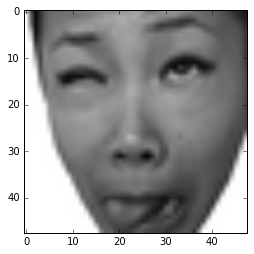

Predicted Emotion: Neutral
Actual Emotion:    Disgust


In [38]:
%matplotlib inline
index = 1323
plt.imshow(x_test[index][0], cmap = 'gray')
plt.show()
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print 'Predicted Emotion: ' + str(emotions[y_pred[index]])
print 'Actual Emotion:    ' + str(emotions[y_test[index]])